In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\\csv\\judges_clean.csv')

In [3]:
df['female_judge'].value_counts()

0 nonfemale      67540
1 female         27202
-9998 unclear     3735
Name: female_judge, dtype: int64

In [4]:
df.drop(df[df['female_judge'] == '-9998 unclear'].index, inplace = True)

In [5]:
df['female_judge'].value_counts()

0 nonfemale    67540
1 female       27202
Name: female_judge, dtype: int64

In [6]:
df3 = pd.DataFrame(df.groupby(['state_code', 'female_judge'])['female_judge'].count()) #Tocheck if Correct or Not

In [7]:
l=df.groupby(['state_code', 'female_judge'])['female_judge'].count().tolist()
i=0
p=[]
while (i < len(l)):
    p.append(l[i]/l[i+1]*100)
    i+=2

In [8]:
key = pd.read_csv('..\\csv\\keys\\cases_court_key.csv')
df_key = (key.drop_duplicates('state_code'))[['state_code', 'state_name']]
df1 = df_key[:-3]
df1=df1.reset_index(drop=True)

In [9]:
for i in range(0, 29):
        df1.loc[i, "count"] = p[i]

In [10]:
df1

,state_code,state_name,count
0,1,Maharashtra,252.864709
1,2,Andhra Pradesh,184.828711
2,3,Karnataka,212.015504
3,4,Kerala,254.166667
4,5,Himachal Pradesh,255.952381
5,6,Assam,152.854812
6,7,Jharkhand,901.315789
7,8,Bihar,1398.545455
8,9,Rajasthan,216.686251
9,10,Tamil Nadu,179.220779


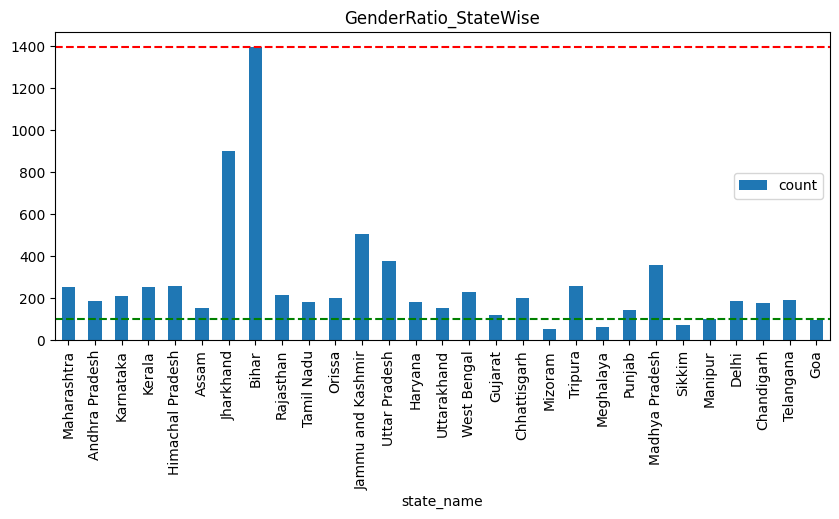

In [11]:
max=df1["count"].max()
df1.plot(x = "state_name", y = "count", kind = "bar", figsize=(10, 4), legend=True)
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=max, color='r', linestyle='--')
plt.title("GenderRatio_StateWise")
plt.show()